# Chapter 5

Q3) a) Explain how k-fold cross-validation is implemented.

The k-fold cross validation is implemented by taking the n observations and randomly splitting it into k non-overlapping groups.
These groups acts as a validation set, and the rest of them act as a training set.

Q3) b)What are the advantages and disadvantages of k-fold cross-validation relative to:

i) The validation set approach ?

1) The validation estimate of the test error rate can be highly variable 
2) A subset of the observations are used to fit the model.

ii) LOOCV ?

The LOOCV cross-validation approach might give approximately unbiased estimates of the test error.




In [1]:
#Q8) a) 

set.seed(1)
y <- rnorm(100)
x <- rnorm(100)
y <- x - 2 * x^2 + rnorm(100)

# n=100 and p=2

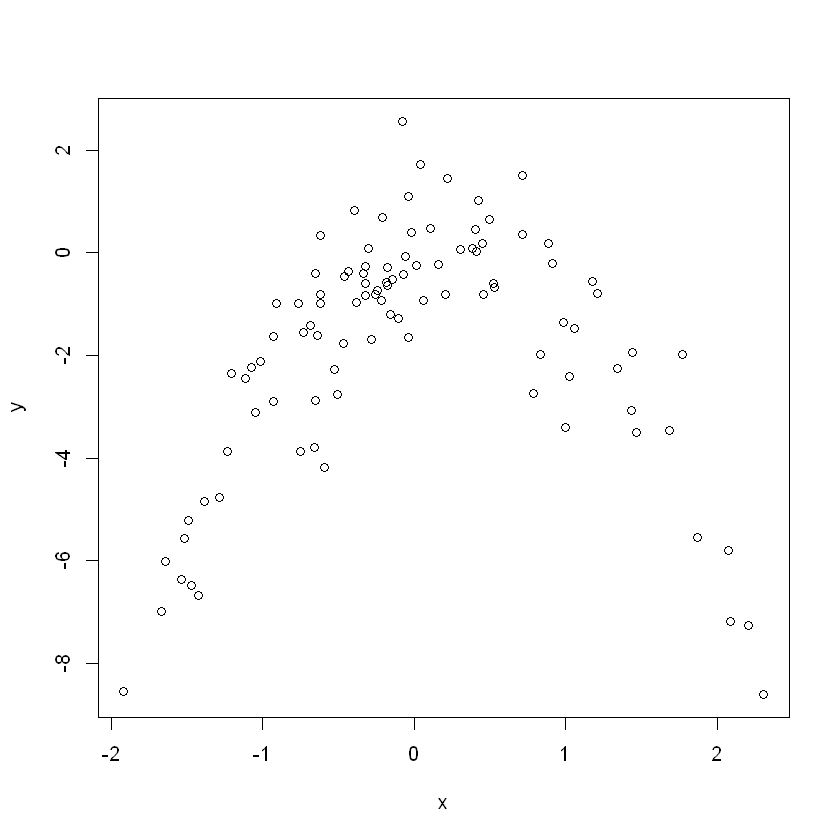

In [2]:
#b) 
plot(x, y)

In [3]:
#c) 
set.seed(11)
x = c(rnorm(100))
y = c(x-2*x^2+rnorm(100))
df = data.frame(x,y)
cv.err = rep(0,4)

In [7]:
# i)
library(boot)
lr.fit = glm(y~poly(x,degree=1,raw=TRUE))
cv.glm(df, lr.fit)$delta[1]

[1] 6.630651

In [8]:
# ii)
lr.fit = glm(y~poly(x,degree=2,raw=TRUE))
cv.glm(df, lr.fit)$delta[1]

[1] 1.032469

In [9]:
# iii)
lr.fit = glm(y~poly(x,degree=3,raw=TRUE))
cv.glm(df, lr.fit)$delta[1]

[1] 1.09055

In [10]:
# iv)
lr.fit = glm(y~poly(x,degree=4,raw=TRUE))
cv.glm(df, lr.fit)$delta[1]

[1] 1.071305

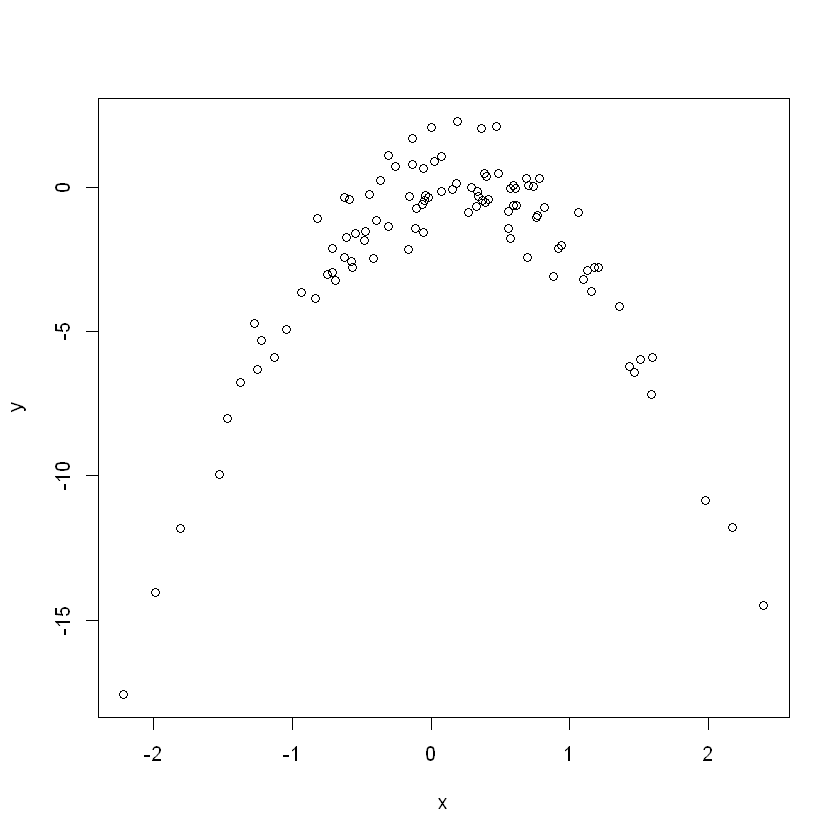

In [12]:
#d) 
set.seed(1)
x = c(rnorm(100))
y = c(x-3*x^2+rnorm(100))
plot(x,y)

In [13]:
# i)
library(boot)
lr.fit = glm(y~poly(x,degree=1,raw=TRUE))
cv.glm(df, lr.fit)$delta[1]

[1] 14.55096

In [14]:
# ii)
lr.fit = glm(y~poly(x,degree=2,raw=TRUE))
cv.glm(df, lr.fit)$delta[1]

[1] 22.01592

In [15]:
# iii)
lr.fit = glm(y~poly(x,degree=3,raw=TRUE))
cv.glm(df, lr.fit)$delta[1]

[1] 22.26654

In [16]:
# iv)
lr.fit = glm(y~poly(x,degree=4,raw=TRUE))
cv.glm(df, lr.fit)$delta[1]

[1] 21.64066

The lowest error is given by the model with a quadratic term.

#e) 
The model with the quadratic term had the lowest LOOCV error. As the the dataset is almost quadratic in shape.

# Chapter 6

1) 
a) When performing best subset selection, the model with k predictors is the model with the smallest RSS.
b) Best test RSS could be from any of the models.
c)
i) True 
ii) True 
iii) False 
iv) False 
v) False 

In [25]:
#9)
install.packages("ISLR")
install.packages("glmnet")

Warning message:
"package 'ISLR' is in use and will not be installed"
also installing the dependency 'RcppEigen'




package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kamal\AppData\Local\Temp\Rtmp0Yy8tK\downloaded_packages


In [20]:
library(ISLR)
data(College)

In [21]:
#a)
train = sample(1:dim(College)[1], dim(College)[1] / 2)
test <- -train
College.train <- College[train, ]
College.test <- College[test, ]

In [22]:
#b)
fit.lm <- lm(Apps ~ ., data = College.train)
pred.lm <- predict(fit.lm, College.test)
mean((pred.lm - College.test$Apps)^2)

[1] 964836.1

In [27]:

library(glmnet)


Loading required package: Matrix

Loaded glmnet 4.1-3



[1] 0.01

In [31]:
#d)

fit.lasso <- glmnet(train.mat, College.train$Apps, alpha = 1, lambda = grid, thresh = 1e-12)
cv.lasso <- cv.glmnet(train.mat, College.train$Apps, alpha = 1, lambda = grid, thresh = 1e-12)
bestlam.lasso <- cv.lasso$lambda.min
bestlam.lasso

[1] 37.64936

In [32]:
pred.lasso <- predict(fit.lasso, s = bestlam.lasso, newx = test.mat)
mean((pred.lasso - College.test$Apps)^2)

[1] 934093.1

In [34]:
#e) 
install.packages("pls")
library(pls)

package 'pls' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kamal\AppData\Local\Temp\Rtmp0Yy8tK\downloaded_packages



Attaching package: 'pls'


The following object is masked from 'package:stats':

    loadings




In [36]:
fit.pcr <- pcr(Apps ~ ., data = College.train, scale = TRUE, validation = "CV")

In [37]:
pred.pcr <- predict(fit.pcr, College.test, ncomp = 10)
mean((pred.pcr - College.test$Apps)^2)

[1] 1670072

In [38]:
#f) 
fit.pls <- plsr(Apps ~ ., data = College.train, scale = TRUE, validation = "CV")

In [39]:
pred.pls <- predict(fit.pls, College.test, ncomp = 10)
mean((pred.pls - College.test$Apps)^2)

[1] 956464

In [40]:
#g) 

test.avg <- mean(College.test$Apps)
lm.r2 <- 1 - mean((pred.lm - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)
lasso.r2 <- 1 - mean((pred.lasso - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)
pcr.r2 <- 1 - mean((pred.pcr - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)
pls.r2 <- 1 - mean((pred.pls - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)

In [41]:
test.avg

[1] 2874.563

In [42]:
lm.r2

[1] 0.9162766

In [43]:
lasso.r2

[1] 0.9189443

In [44]:
pcr.r2

[1] 0.8550799

In [45]:
pls.r2 

[1] 0.917003

In [46]:
 #All models, except PCR, predict college applications with high accuracy.

# Chapter 7

In [47]:
#9)
#a)

library(MASS)
set.seed(1)
fit <- lm(nox ~ poly(dis, 3), data = Boston)
summary(fit)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


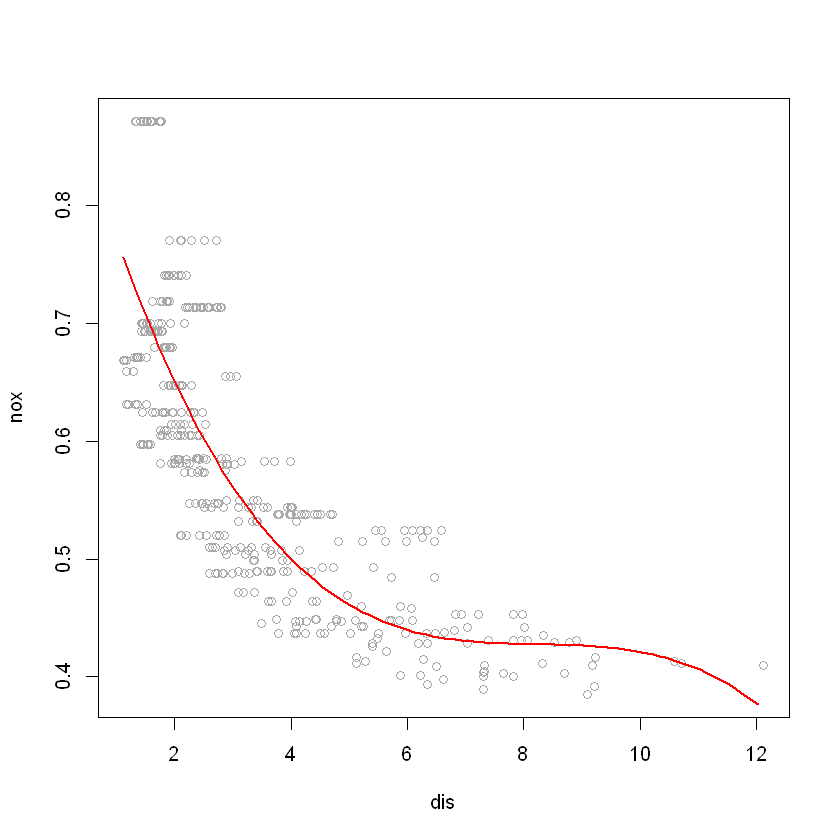

In [48]:
dislims <- range(Boston$dis)
dis.grid <- seq(from = dislims[1], to = dislims[2], by = 0.1)
preds <- predict(fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, preds, col = "red", lwd = 2)

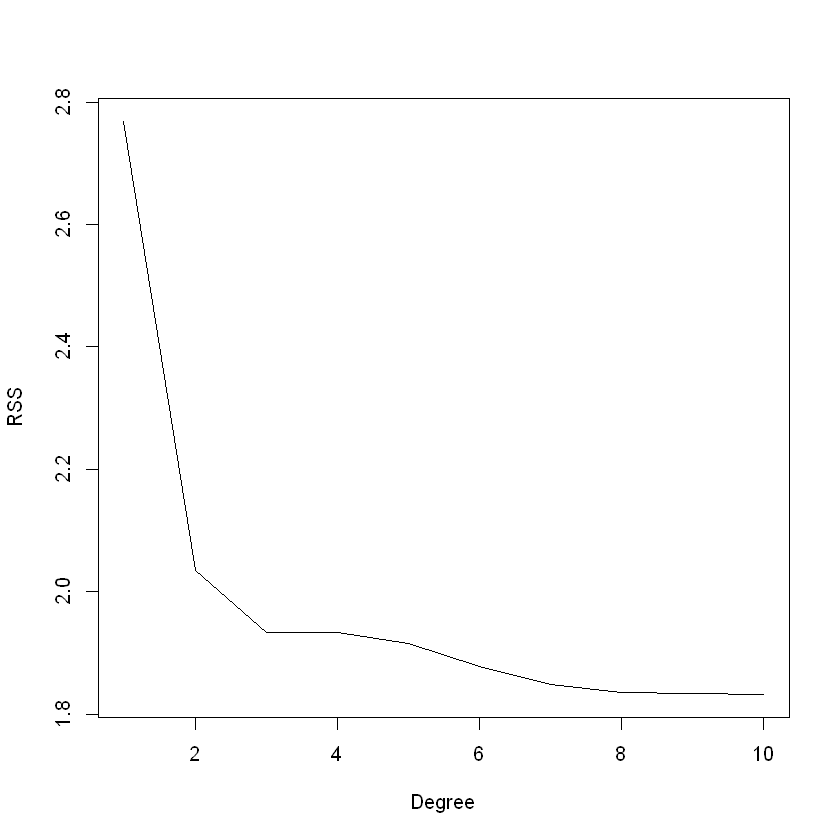

In [49]:
#b) 
rss <- rep(NA, 10)
for (i in 1:10) {
    fit <- lm(nox ~ poly(dis, i), data = Boston)
    rss[i] <- sum(fit$residuals^2)
}
plot(1:10, rss, xlab = "Degree", ylab = "RSS", type = "l")

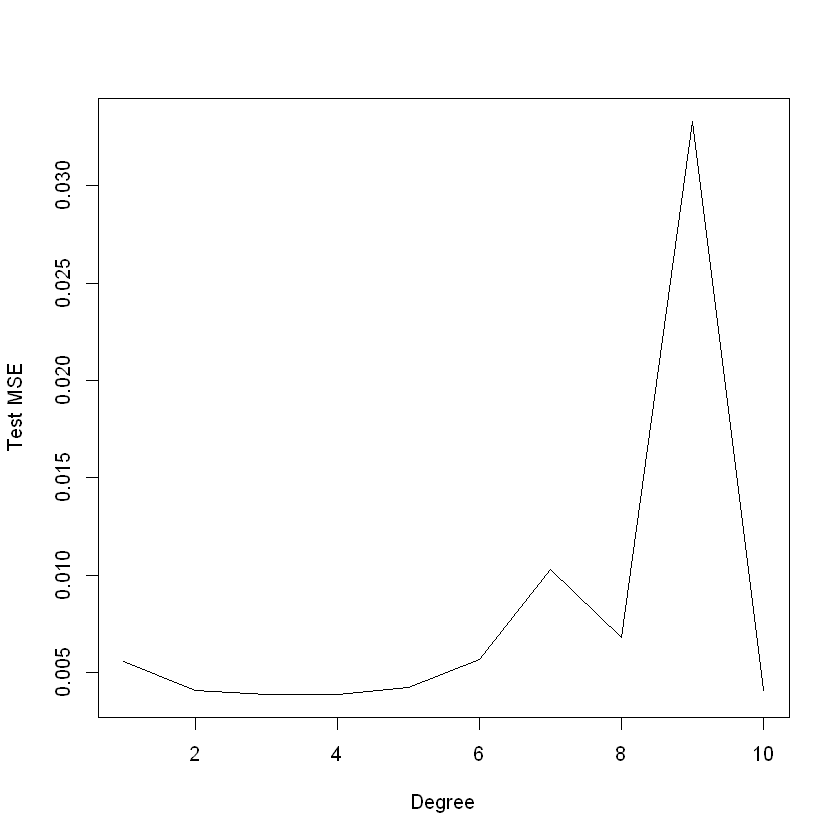

In [50]:
#c) 
deltas <- rep(NA, 10)
for (i in 1:10) {
    fit <- glm(nox ~ poly(dis, i), data = Boston)
    deltas[i] <- cv.glm(Boston, fit, K = 10)$delta[1]
}
plot(1:10, deltas, xlab = "Degree", ylab = "Test MSE", type = "l")

In [52]:
#d) 

install.packages('splines')

Warning message:
"package 'splines' is a base package, and should not be updated"


In [54]:
library(splines)
fit <- lm(nox ~ bs(dis, knots = c(4, 7, 11)), data = Boston)
summary(fit)


Call:
lm(formula = nox ~ bs(dis, knots = c(4, 7, 11)), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124567 -0.040355 -0.008702  0.024740  0.192920 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    0.73926    0.01331  55.537  < 2e-16 ***
bs(dis, knots = c(4, 7, 11))1 -0.08861    0.02504  -3.539  0.00044 ***
bs(dis, knots = c(4, 7, 11))2 -0.31341    0.01680 -18.658  < 2e-16 ***
bs(dis, knots = c(4, 7, 11))3 -0.26618    0.03147  -8.459 3.00e-16 ***
bs(dis, knots = c(4, 7, 11))4 -0.39802    0.04647  -8.565  < 2e-16 ***
bs(dis, knots = c(4, 7, 11))5 -0.25681    0.09001  -2.853  0.00451 ** 
bs(dis, knots = c(4, 7, 11))6 -0.32926    0.06327  -5.204 2.85e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06185 on 499 degrees of freedom
Multiple R-squared:  0.7185,	Adjusted R-squared:  0.7151 
F-statistic: 212.3 on 6 and 499 DF,  p-value: <

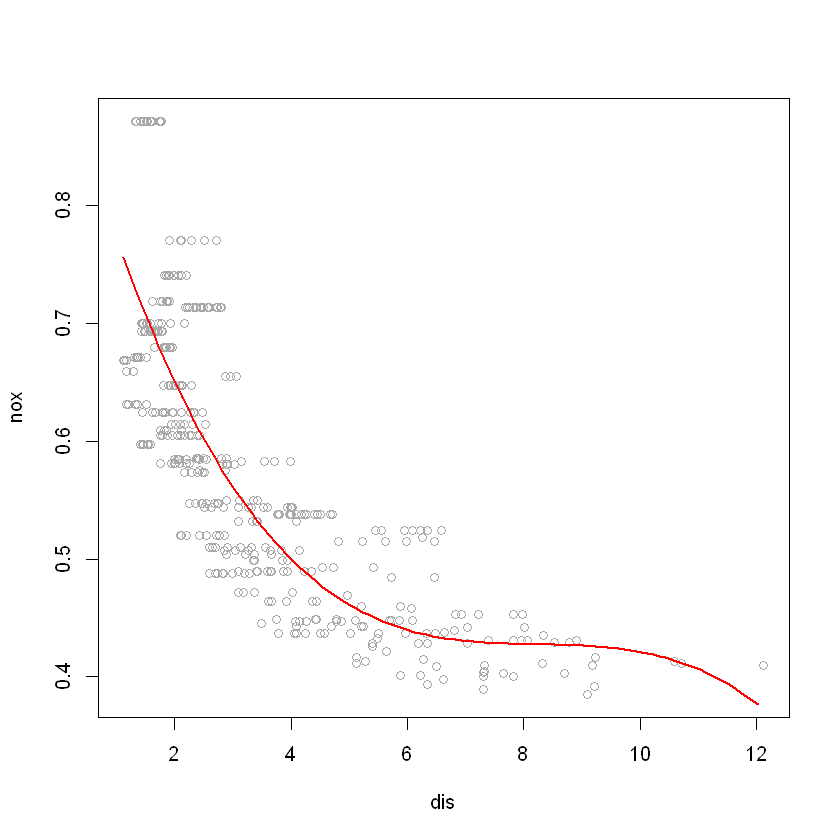

In [55]:
pred <- predict(fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, preds, col = "red", lwd = 2)

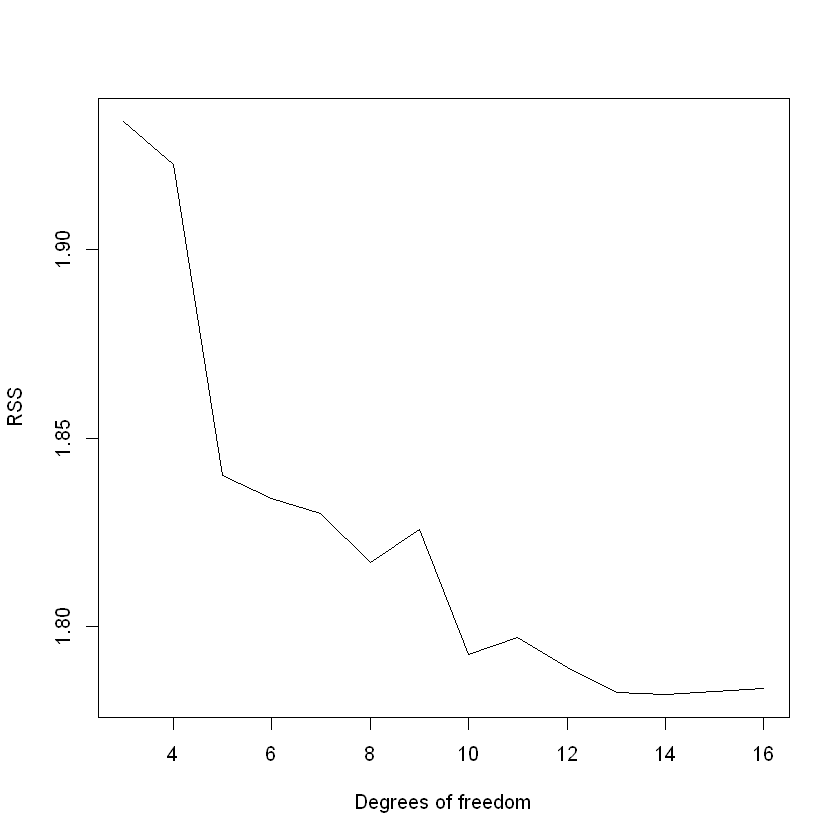

In [56]:
#e) 

rss <- rep(NA, 16)
for (i in 3:16) {
    fit <- lm(nox ~ bs(dis, df = i), data = Boston)
    rss[i] <- sum(fit$residuals^2)
}
plot(3:16, rss[-c(1, 2)], xlab = "Degrees of freedom", ylab = "RSS", type = "l")
